In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? غ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# *PR-2 Image_Segmentation*

In [2]:
import os
from PIL import Image
import numpy as np
import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import natsort
from os import listdir


Mount data from google drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1 


load data images


In [9]:
def load_data(images_sub_path , ground_sub_path , _type , matrix_shape):

  groundTruth_ = []
  path_images = images_sub_path + _type
  path_groundT = ground_sub_path + _type

  images_dir_list = listdir(path_images)
  images_matrix = np.arange(matrix_shape[0] * matrix_shape[1]).reshape(matrix_shape)

  pixels = matrix_shape[0] // len(images_dir_list)
  dim = matrix_shape[1]

  itr = 0
  for image in images_dir_list:
    gT = loadmat(path_groundT + image[:-4])
    img = Image.open(path_images + image)
    images_matrix[pixels * itr : pixels + (pixels * itr),:] = np.array(img).reshape(pixels , dim)

    for m in range(0,gT['groundTruth'].shape[1]):
      groundTruth_.append(gT['groundTruth'][0][m][0][0][0])
    itr +=1
  
  return images_matrix , groundTruth_



In [21]:
sub_images_path = '/content/drive/MyDrive/BSR/BSDS500/data/images'
sub_groundtruth_path = '/content/drive/MyDrive/BSR/BSDS500/data/groundTruth'

num_pixels = 321*481
num_dimen = 3
# TODO: reduce data_images_test to 50 pic 
test_imgs, test_gt = load_data(sub_images_path,sub_groundtruth_path,'/test/',(num_pixels*200,num_dimen))
train_imgs, train_gt = load_data(sub_images_path,sub_groundtruth_path ,'/train/', (num_pixels*200,num_dimen))
val_imgs, val_gt = load_data(sub_images_path,sub_groundtruth_path,'/val/', (num_pixels*100,num_dimen))
print(test_imgs.shape)

(30880200, 3)


load data ground truth

<Figure size 432x288 with 0 Axes>

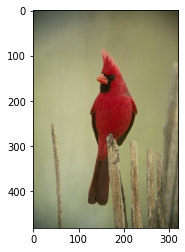

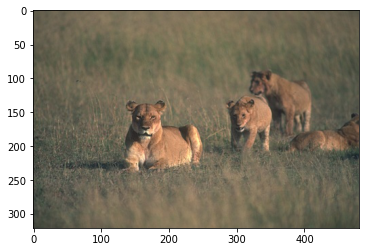

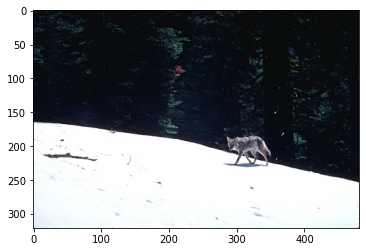

<Figure size 432x288 with 0 Axes>

In [11]:
plt.imshow(test_imgs[:num_pixels].reshape(481,321,3));
plt.figure();
plt.imshow(train_imgs[:num_pixels].reshape(321,481,3))
plt.figure()
plt.imshow(val_imgs[:num_pixels].reshape(321,481,3))
plt.figure()

# 2) Visualization 

In [19]:
def visualization(images , groundTruth_):
  plt.title("Image")
  plt.imshow(images[:num_pixels].reshape(481 , 321 ,3));
  plt.figure();

  plt.title("Ground Truth Images")
  plt.imshow(groundTruth_[0]);
  plt.figure();
  
  plt.imshow(groundTruth_[1]);
  plt.figure();
  
  plt.imshow(groundTruth_[2]);
  plt.figure();
  
  plt.imshow(groundTruth_[3]);
  plt.figure();
  
  plt.imshow(groundTruth_[4]);

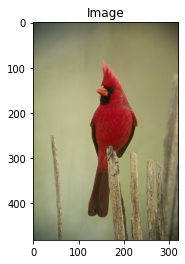

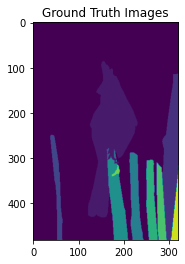

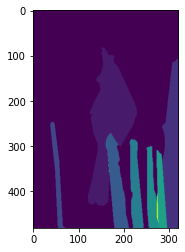

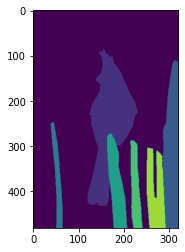

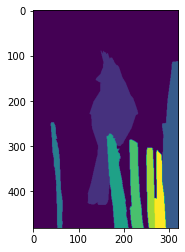

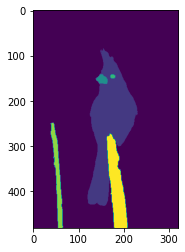

In [20]:
visualization(test_imgs , test_gt)

# Q3


# Q4

# Q5
